In [1]:
import pandas
from matplotlib import pyplot as plt

In [4]:
df = pandas.read_csv('pace_instances.csv', sep=',')
df.head()

,num,n,m,solved,opt,upper,dels,adds,low_star,low_p3,...,after heavy non-edge,forbs heavy non-edge,time heavy non-edge,spend heavy non-edge,lower after heavy non-edge,after forced single merge,forbs forced single merge,time forced single merge,spend forced single merge,lower after forced single merge
0,1,10,11,1,3,3,3,0,3,3,...,6,0,0,0,3,0,0,0,3,3
1,2,20,68,1,7,7,7,0,7,7,...,20,73,0,0,7,0,0,2,7,7
2,3,20,73,1,42,42,35,7,40,35,...,20,29,0,0,40,20,25,29,0,40
3,4,20,75,1,32,32,21,11,32,32,...,20,21,0,0,32,0,0,12,32,32
4,5,20,97,1,46,46,39,7,41,44,...,20,22,0,0,41,19,20,38,3,43


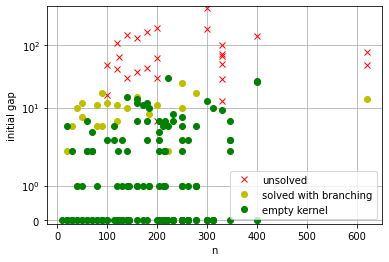

In [18]:
df['gap'] = df.upper - df.low_star
df[df.solved==0].plot(x='n', y='gap', style='rx', label='unsolved')
ds = df[df.solved==1]
ds[ds['after all reds']>0].plot(x='n', y='gap', style='yo', ax=plt.gca(), label='solved with branching')
ds[ds['after all reds']==0].plot(x='n', y='gap', style='go', ax=plt.gca(), label='empty kernel')
plt.yscale('symlog')
plt.ylim(bottom=-0.1)
plt.grid()
plt.ylabel('initial gap')
plt.savefig('plots/pace-gap.pdf', bbox_inches='tight')

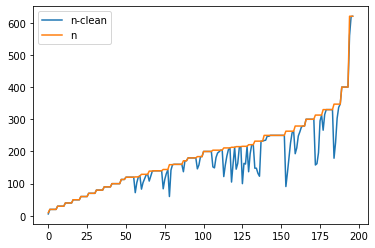

In [26]:
df['n-clean'].plot()
df['n'].plot()
plt.legend()
plt.show()

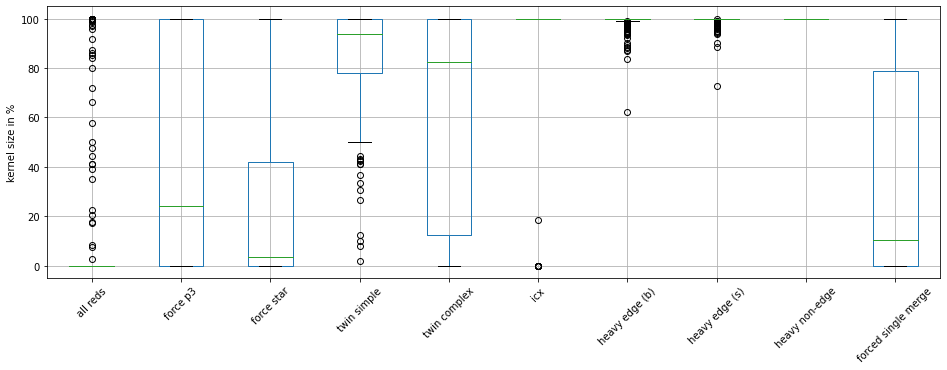

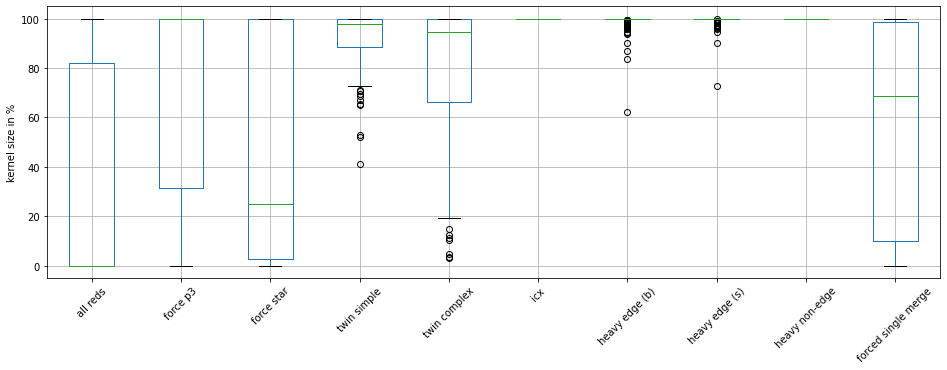

In [66]:
reds = ["all reds", "force p3", "force star", "twin simple", "twin complex", "icx", "heavy edge (b)", "heavy edge (s)", "heavy non-edge", "forced single merge"]

for r in reds:
    df[f'after% {r}'] = 100 * df[f'after {r}'] / df['n-clean']

plt.gcf().set_size_inches(16,5)
plt.ylabel('kernel size in %')
#plt.title('reduced instance after exhaustively applying a reduction')
df.boxplot(['after% ' + r for r in reds], rot=45)
plt.gca().set_xticklabels(reds)
plt.savefig('plots/pace-kernel-size.pdf', bbox_inches='tight')
plt.show()


plt.gcf().set_size_inches(16,5)
plt.ylabel('kernel size in %')
#plt.title('reduced instance after exhaustively applying a reduction')
df[df.gap>0].boxplot(['after% ' + r for r in reds], rot=45)
plt.gca().set_xticklabels(reds)
plt.savefig('plots/pace-kernel-size2.pdf', bbox_inches='tight')

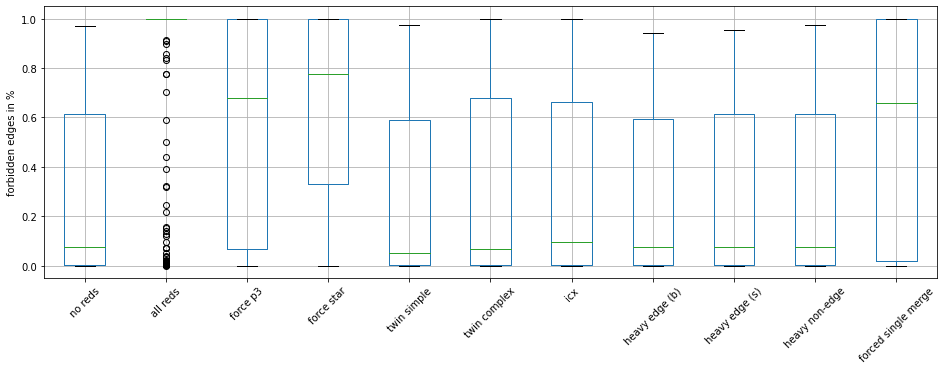

In [43]:
df['forbs%'] = df['dist4+'] / (df['n-clean'] * (df['n-clean']-1) / 2)
for r in reds:
    df[f'forbs% after {r}'] = df[f'forbs {r}'] / (df[f'after {r}'] * (df[f'after {r}']-1) / 2)
    df[f'forbs% after {r}'].fillna(1, inplace=True)

df.boxplot(['forbs%'] + [f'forbs% after {r}' for r in reds], rot=45)
plt.gcf().set_size_inches(16,5)
plt.gca().set_xticklabels(['no reds'] + reds)
plt.ylabel('forbidden edges in %')
plt.savefig('plots/pace-kernel-forbs.pdf', bbox_inches='tight')

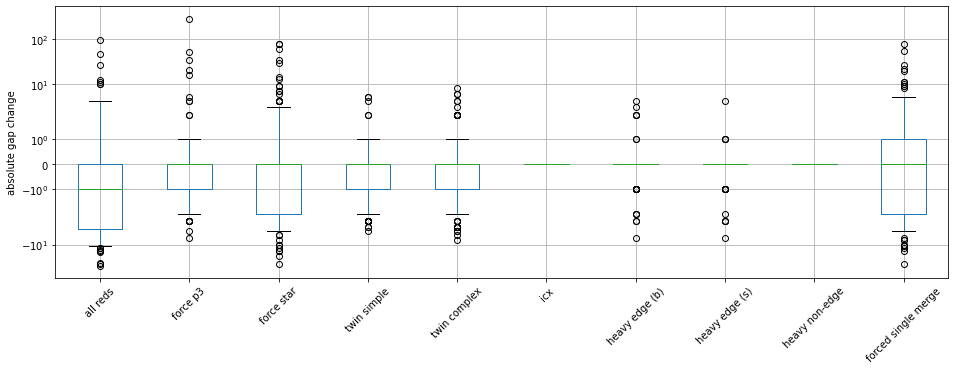

In [63]:
df['gap'] = df.upper - df.low_star
for r in reds:
    df[f'gap change {r}'] = (df.upper - df[f'lower after {r}']) - df.gap
    
df[df.gap>0].boxplot([f'gap change {r}' for r in reds], rot=45)
plt.gcf().set_size_inches(16,5)
plt.gca().set_xticklabels(reds)
plt.ylabel('absolute gap change')
plt.yscale('symlog')
plt.savefig('plots/pace-kernel-gap.pdf', bbox_inches='tight')

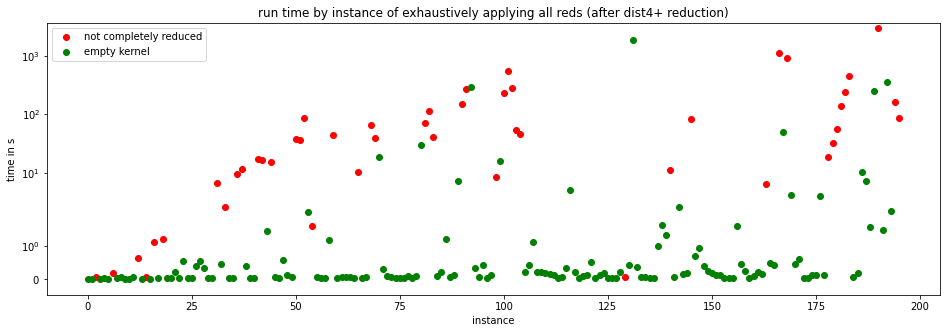

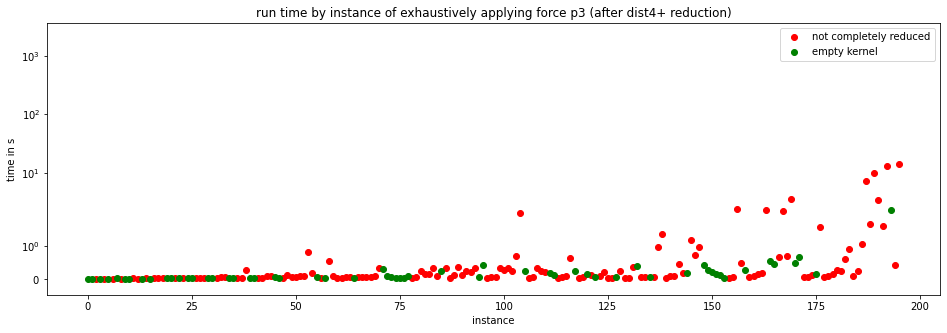

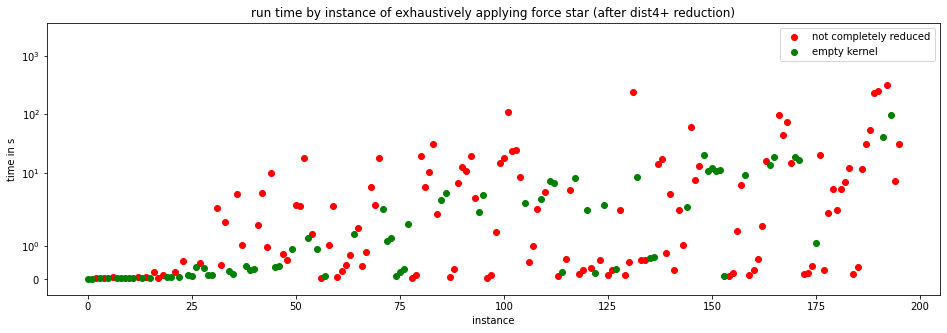

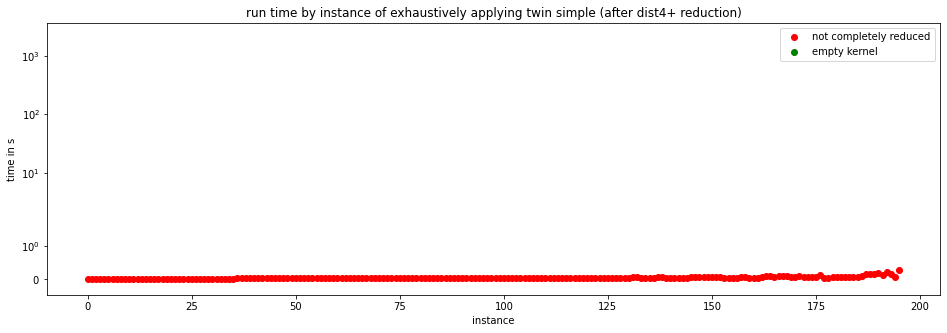

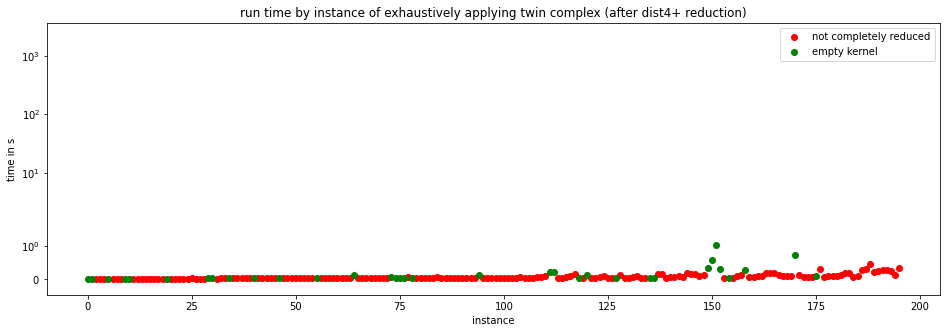

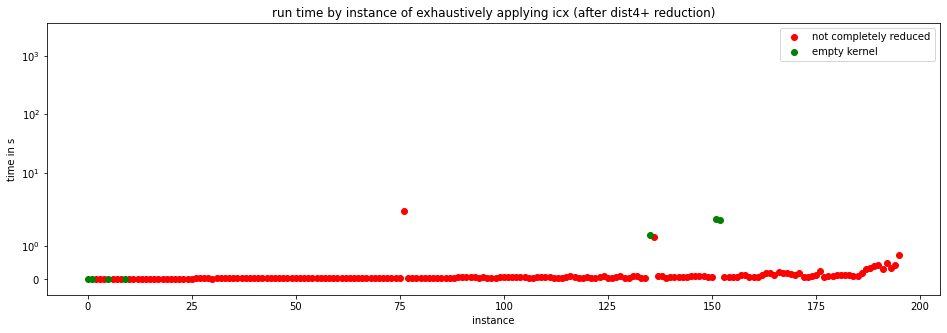

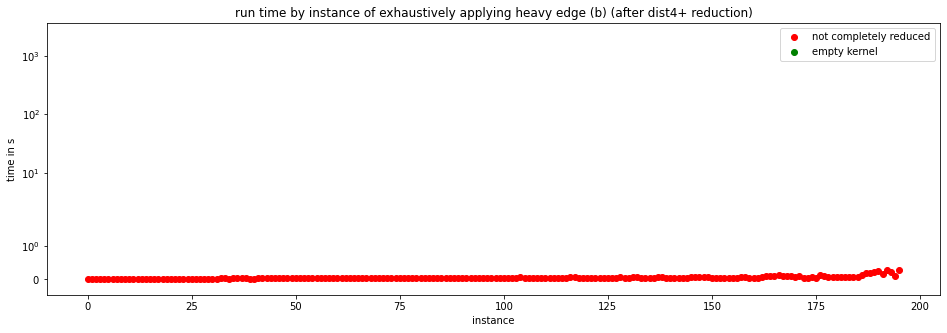

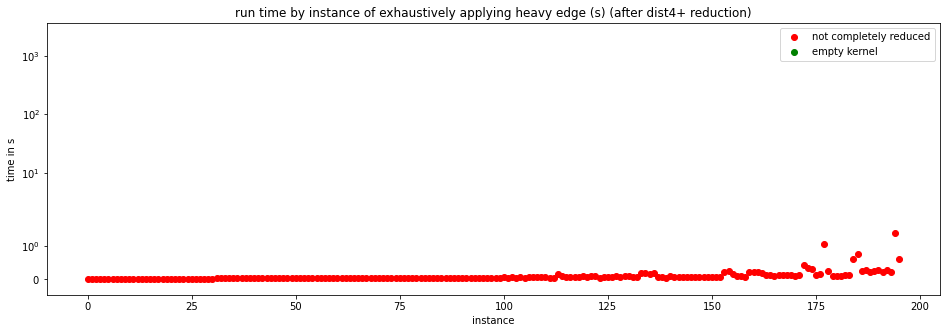

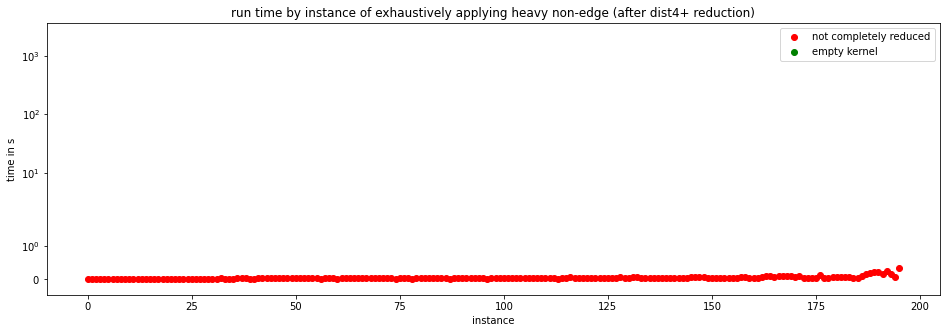

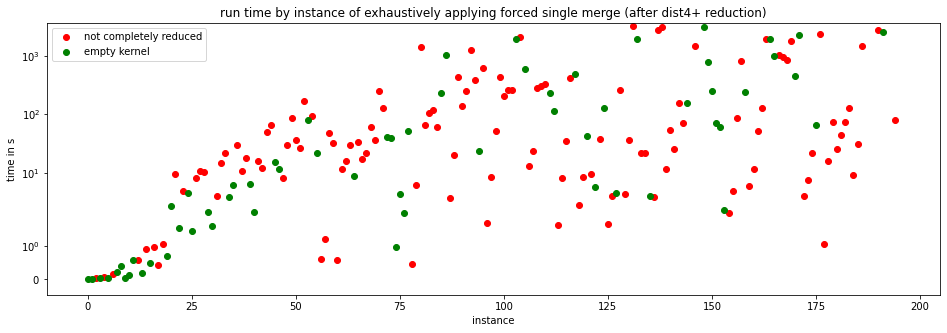

In [5]:
for r in reds:
    plt.gcf().set_size_inches(16,5)
    plt.gca().set_title(f'run time by instance of exhaustively applying {r} (after dist4+ reduction)')
    (df[df[f'after {r}']>0][f'time {r}'] / 1000).plot(style='ro', label='not completely reduced')
    (df[df[f'after {r}']==0][f'time {r}'] / 1000).plot(style='go', label='empty kernel')
    plt.gca().set_xlabel('instance')
    plt.gca().set_ylabel('time in s')
    plt.gca().set_yscale('symlog')
    plt.gca().set_ylim(bottom=-0.5, top=60*60)
    plt.legend()
    plt.show()

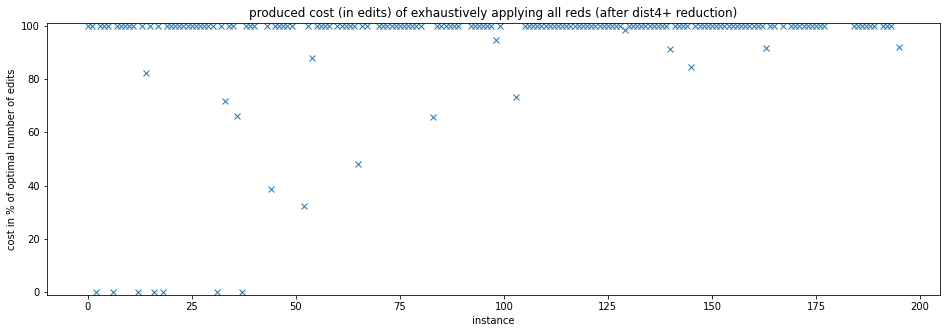

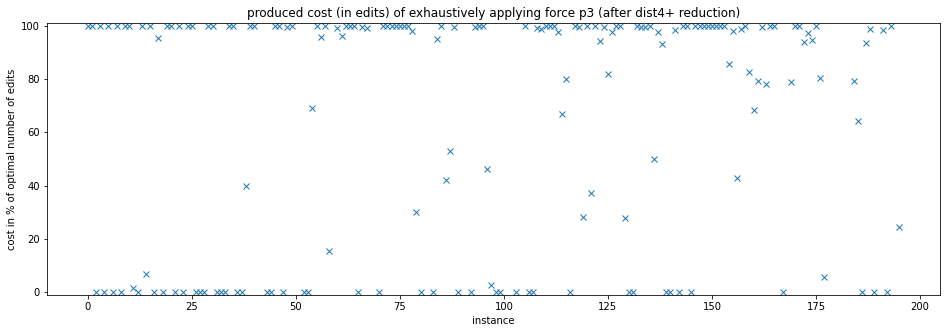

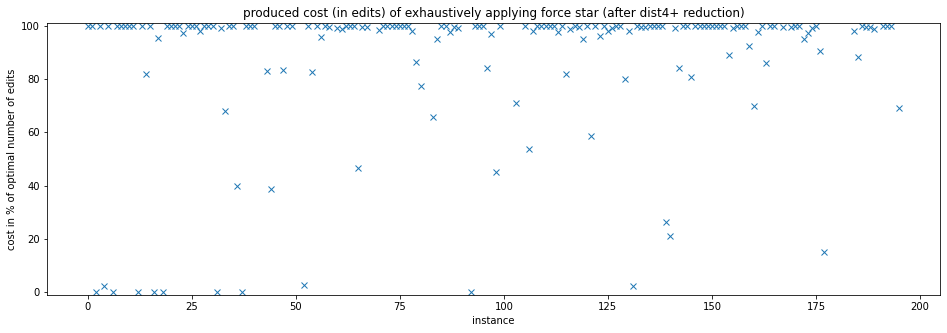

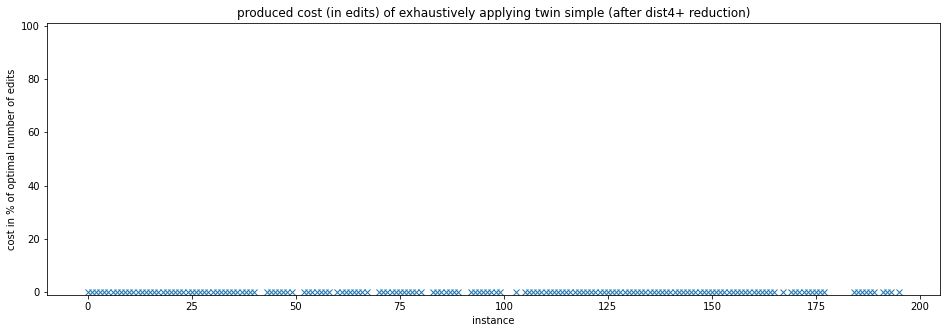

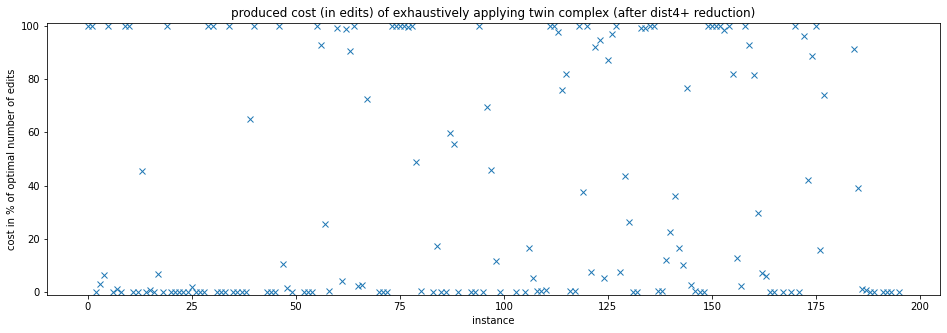

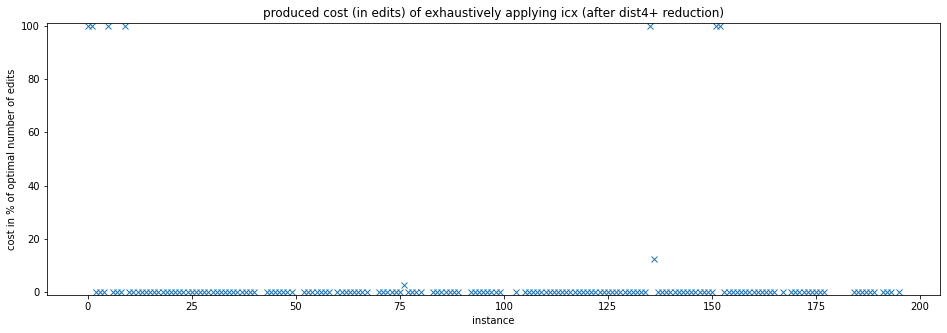

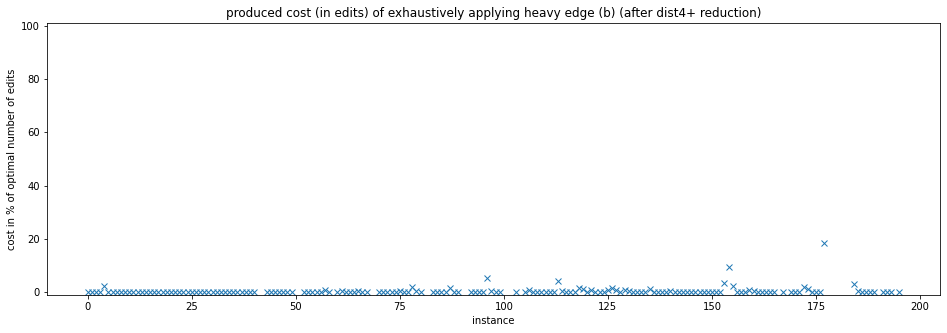

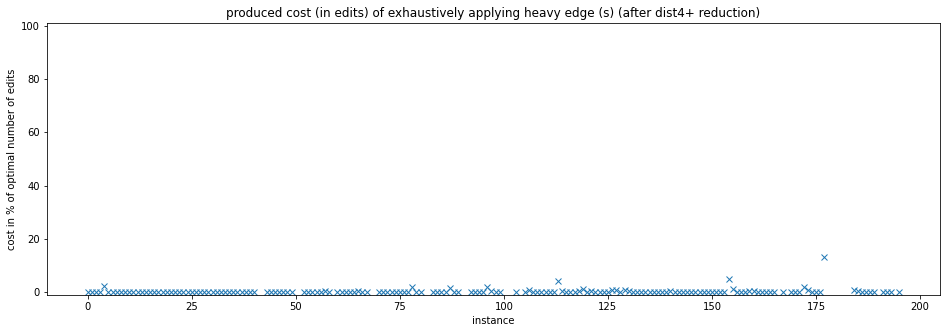

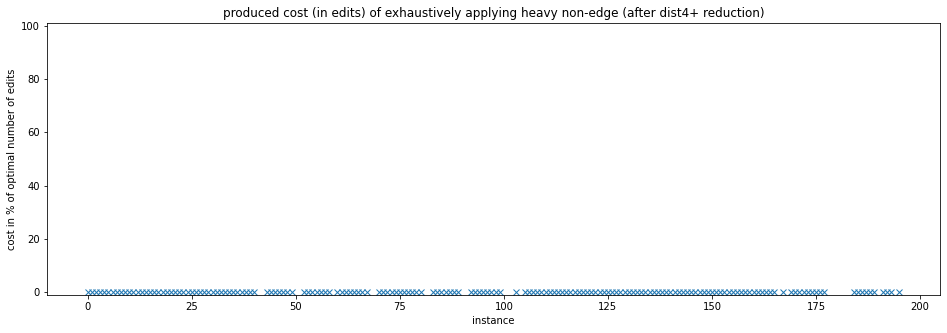

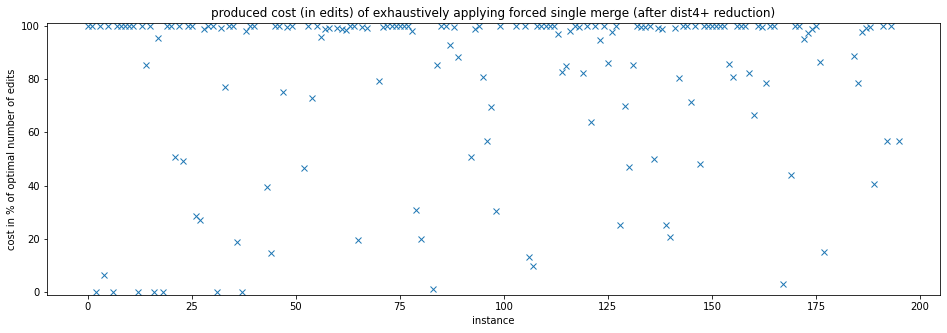

In [6]:
for r in reds:
    plt.gcf().set_size_inches(16,5)
    plt.gca().set_title(f'produced cost (in edits) of exhaustively applying {r} (after dist4+ reduction)')
    ds = df[df.solved==1]
    (ds[f'spend {r}'] / ds.opt * 100).plot(style='x')
    plt.gca().set_xlabel('instance')
    plt.gca().set_ylabel('cost in % of optimal number of edits')
    plt.gca().set_ylim(bottom=-1, top=101)
    plt.show()

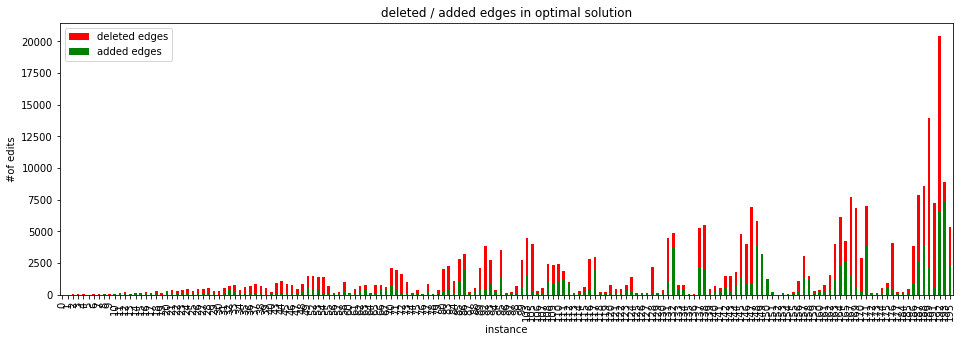

In [7]:
plt.gcf().set_size_inches(16,5)
plt.title(f'deleted / added edges in optimal solution')
ds = df[df.solved==1]
(ds.dels+ds.adds).plot.bar(color='r', label='deleted edges')
ds.adds.plot.bar(color='g', label='added edges')
plt.xlabel('instance')
plt.ylabel('#of edits')
plt.legend()
plt.show()

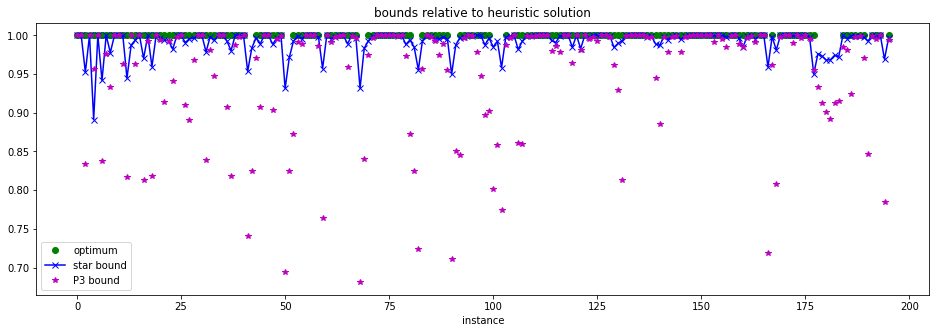

In [8]:
ax = plt.gca()
plt.gcf().set_size_inches(16,5)

solved = df.solved==True
low_rel = df.low_star/df.upper
opt_rel = df.opt/df.upper
p3_rel = df.low_p3/df.upper

ax.plot(opt_rel[solved], 'go', label='optimum')
ax.plot(low_rel, 'bx-', label='star bound')
ax.plot(p3_rel, 'm*', label='P3 bound')


ax.set_xlabel('instance')
ax.set_title('bounds relative to heuristic solution')
ax.legend()

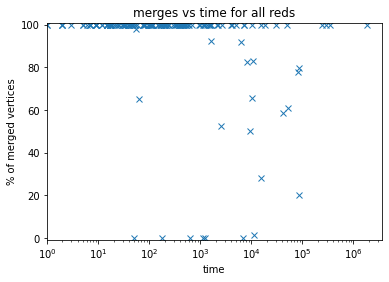

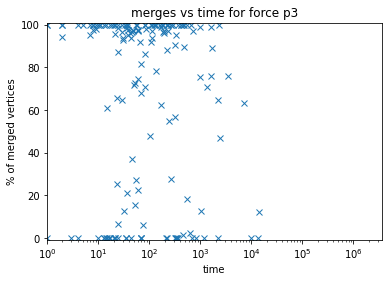

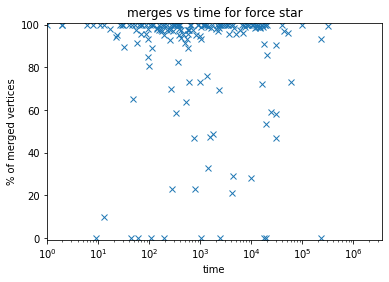

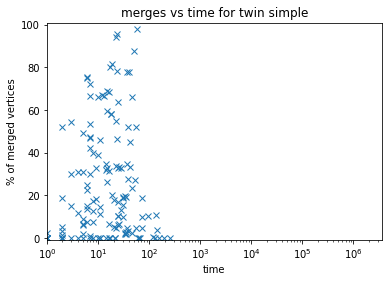

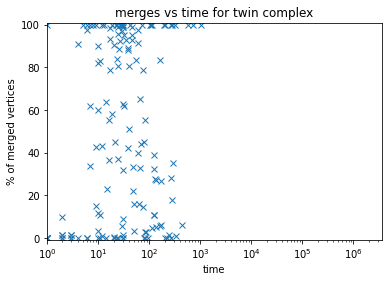

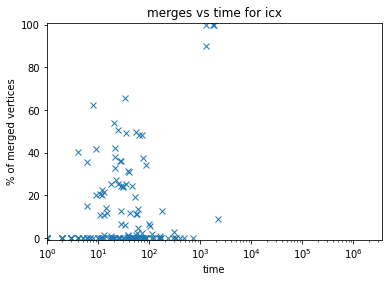

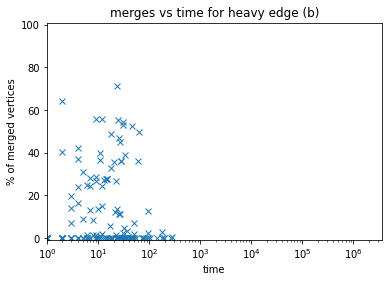

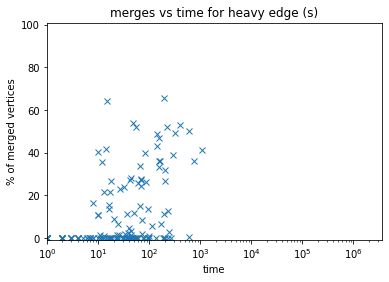

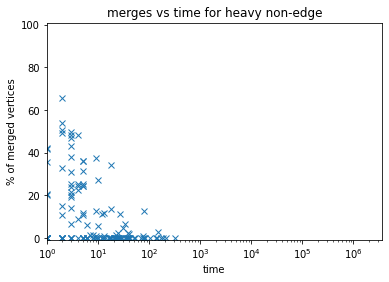

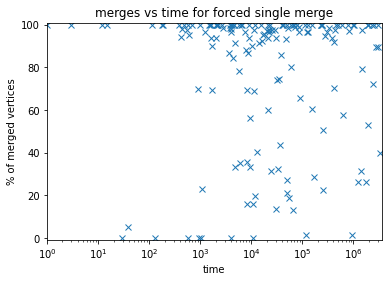

In [21]:
ds = df[df.solved==1]
for r in reds:
    plt.title(f'merges vs time for {r}')
    merges = (ds.n - ds[f'after {r}']) / ds.n * 100
    plt.plot(ds[f'time {r}'], merges, 'x')
    plt.xlabel('time')
    plt.ylabel('% of merged vertices')
    plt.ylim(bottom=-1, top=101)
    plt.xlim(left=1,right=1000*60*60)
    plt.semilogx()
    plt.show()

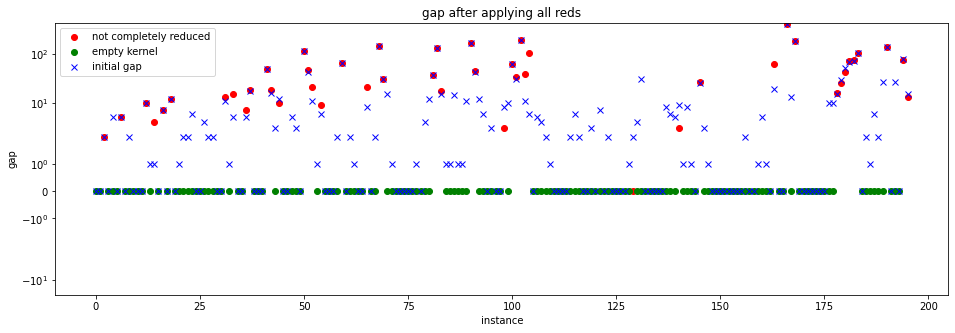

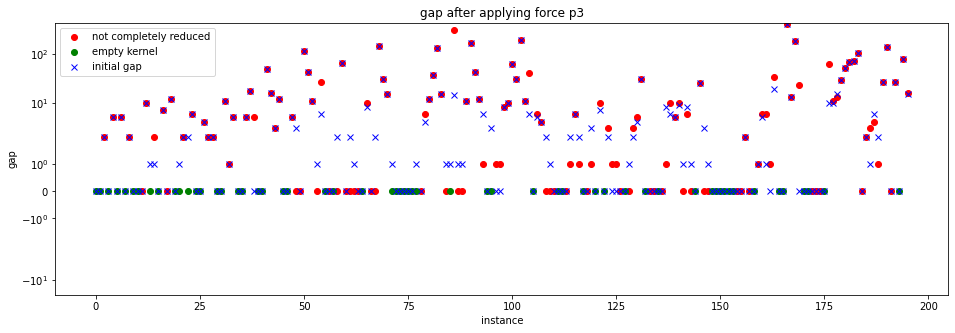

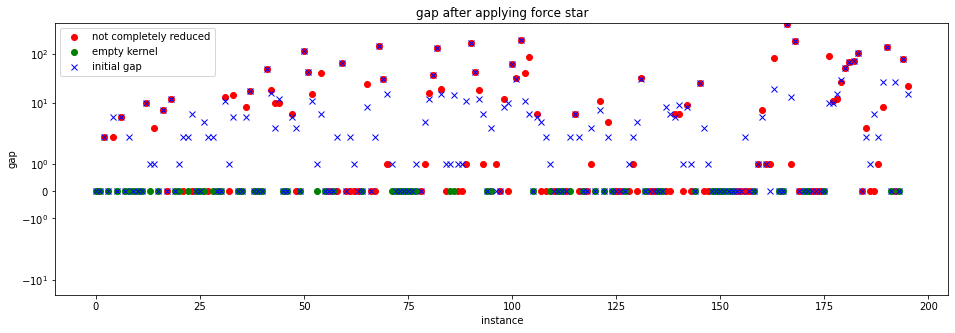

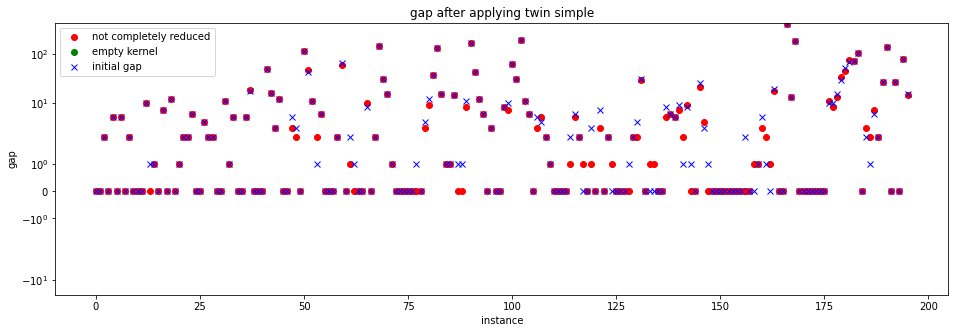

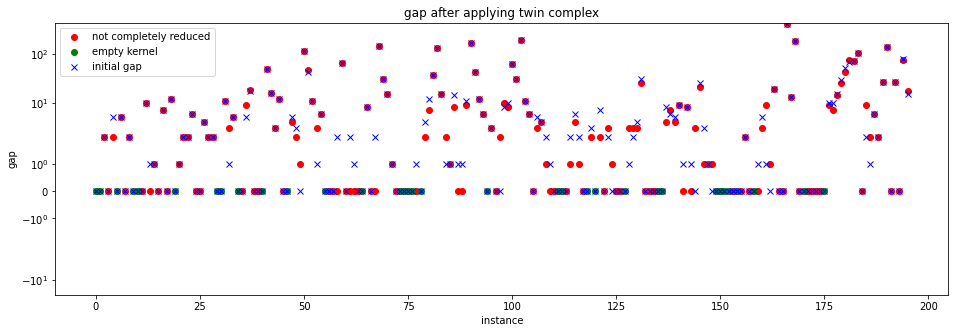

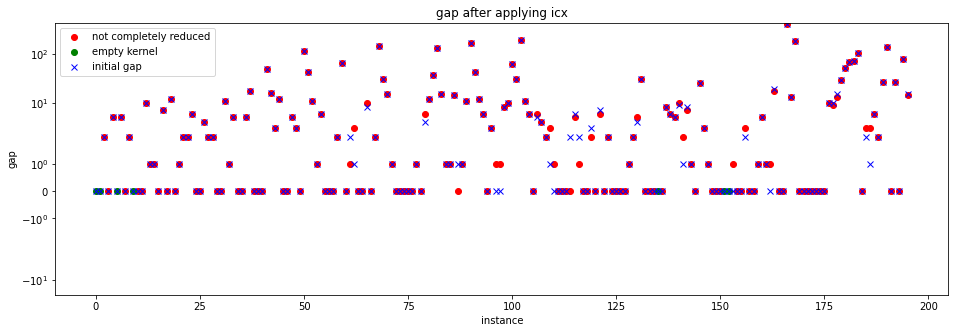

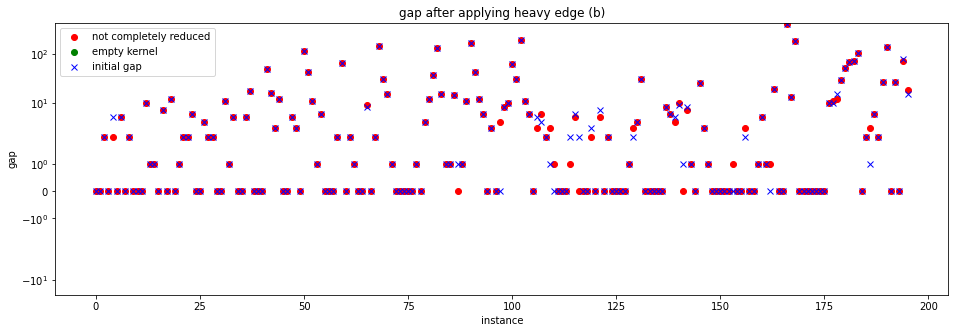

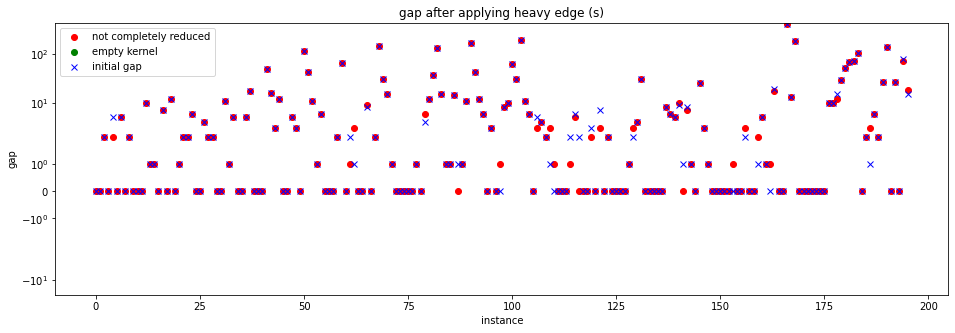

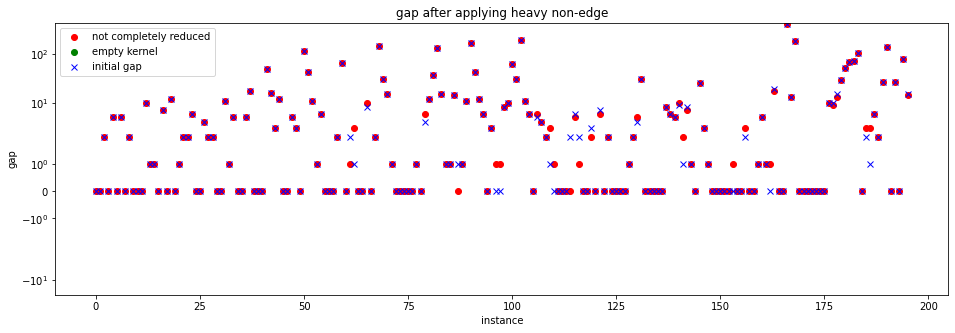

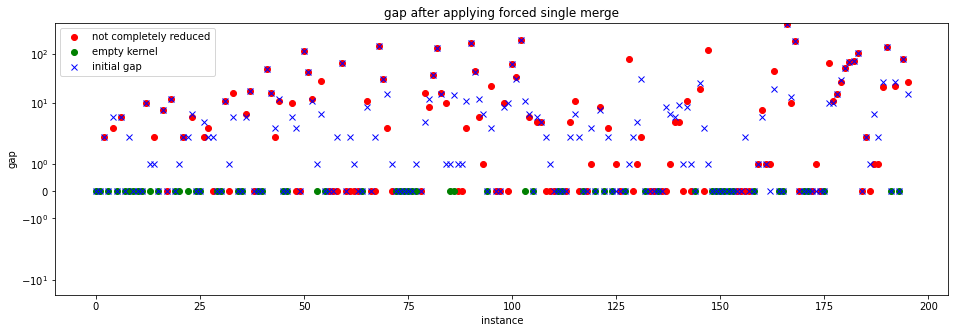

In [23]:
for r in reds:
    df[f'gap after {r}'] = df['upper'] - df[f'lower after {r}']
    plt.gcf().set_size_inches(16,5)
    plt.title(f'gap after applying {r}')
    df[df[f'after {r}']>0][f'gap after {r}'].plot(style='ro', label='not completely reduced')
    df[df[f'after {r}']==0][f'gap after {r}'].plot(style='go', label='empty kernel')
    df['gap'].plot(style='bx', label='initial gap')
    plt.xlabel('instance')
    plt.ylabel('gap')
    plt.yscale('symlog')
    #plt.ylim(bottom=-0.5)
    plt.legend()
    plt.show()